In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from ipywidgets import interact
import ipywidgets as widgets
import warnings
from stock_segmentation import *

warnings.filterwarnings('ignore')

%matplotlib inline

Read data:

In [2]:
df = pd.read_csv("./More Data.csv", index_col=0)

dates = [dt.datetime.strptime(d, "%m/%d/%Y") for d in df.Open.index]
df["DayIndex"] = [(d - dates[0]).days for d in dates]

In [3]:
x = df.DayIndex.values.astype(float)
y = df.Open.values

Optimal smoothing parameter:

In [4]:
smooth_min, smooth_opt, smooth_max = optimal_piecewise_linear(x, y, 1000, granularity_penalty=0.1, verbose=True)[0]

Minimal smoothing: 32768, maximal smoothing: 18254296.56
Step 0. Min penalty 0.11643312595350375
Step 1. Min penalty 0.1125587291740487
Step 2. Min penalty 0.08736012238705526
Step 3. Min penalty 0.07606796737018706
Step 4. Min penalty 0.07390230655737429


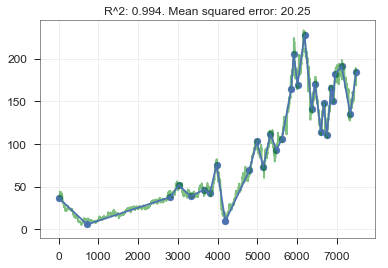

In [5]:
plot_regression(x, y, smooth_opt)

Select smoothing parameter by hands:

In [6]:
interact(lambda log_smooth: plot_regression(x, y, 10**log_smooth), 
         log_smooth=widgets.FloatSlider(min=np.log10(smooth_min), max=np.log10(smooth_max), 
                                           step=0.05, value=np.log10(smooth_opt), continuous_update=False));

interactive(children=(FloatSlider(value=5.024186210432881, continuous_update=False, description='log_smooth', max=7.261365101806713, min=4.515449934959718, step=0.05), Output()), _dom_classes=('widget-interact',))